# <center> <img src="figs/LogoUFSCar.jpg" alt="Logo UFScar" width="110" align="left"/>  <br/> <center>Universidade Federal de São Carlos (UFSCar)<br/><font size="4"> Departamento de Computação, campus Sorocaba</center></font>
</p>

<font size="4"><center><b>Disciplina: Aprendizado de Máquina</b></center></font>
  
<font size="3"><center>Prof. Dr. Tiago A. Almeida</center></font>

## <center>Projeto Final</center>

**Nome**: Gabriel Araujo Streicher

**RA**: 822485


---
### Carregar Dados


In [2]:
%load_ext autoreload
%autoreload 2

In [5]:
## Carregar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scripts.dataset import *
from scripts.analise_exploratoria import *
import os

## Configurações de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [3]:
## Carregar dados e extrair features
BASE_PATH = os.path.join('../')
train_df, test_df, users_info, data_dict = load_data(BASE_PATH)
    
user_ids = train_df['Id'].unique()
user_ids = np.concatenate([user_ids, test_df['Id'].unique()])
features_df = build_features_df(user_ids, BASE_PATH)

train_df = train_df.merge(features_df, on="Id", how="left")
train_df = train_df.merge(users_info, on="Id", how="left")

test_df = test_df.merge(features_df, on="Id", how="left")
test_df = test_df.merge(users_info, on="Id", how="left")

print('Dados carregados com sucesso.')

Dados carregados com sucesso.


---
### Análise exploratória

Nesta seção, deve ser feita a leitura da base de dados e todas as análises necessárias para interpretar e analisar os dados, tais como:
* Significado de cada atributo
* Medidas descritivas
* Gráficos

In [4]:
train_df.head()

,Id,Label,ACC_0_mean,ACC_0_std,ACC_0_min,ACC_0_max,ACC_0_median,ACC_0_range,ACC_1_mean,ACC_1_std,...,TEMP_0_range,Gender,Age,Height (cm),Weight (kg),Does physical activity regularly?,Protocol,Stress Inducement,Aerobic Exercise,Anaerobic Exercise
0,U_79201,STRESS,-44.501290,8.604691,-105.0,32.0,-44.0,137.0,-12.289116,12.388127,...,2.28,m,21,175,65,Yes,V1,Yes,Yes,Yes
1,U_56491,ANAEROBIC,-34.733378,22.011913,-128.0,127.0,-42.0,255.0,24.168695,30.606597,...,2.72,f,21,165,55,Yes,V2,Yes,Yes,Yes
2,U_94628,ANAEROBIC,17.589971,17.434519,-128.0,127.0,14.0,255.0,-27.849300,17.400676,...,1.98,f,29,164,80,No,V2,Yes,Yes,Yes
3,U_97819,AEROBIC,-17.948287,22.710126,-128.0,102.0,-5.0,230.0,-26.343604,19.679593,...,3.37,f,21,172,65,Yes,V2,Yes,Yes,Yes
4,U_96956,STRESS,-36.605036,21.095485,-105.0,114.0,-38.0,219.0,-2.321797,10.343538,...,1.22,f,21,169,58,No,V2,Yes,Yes,Yes


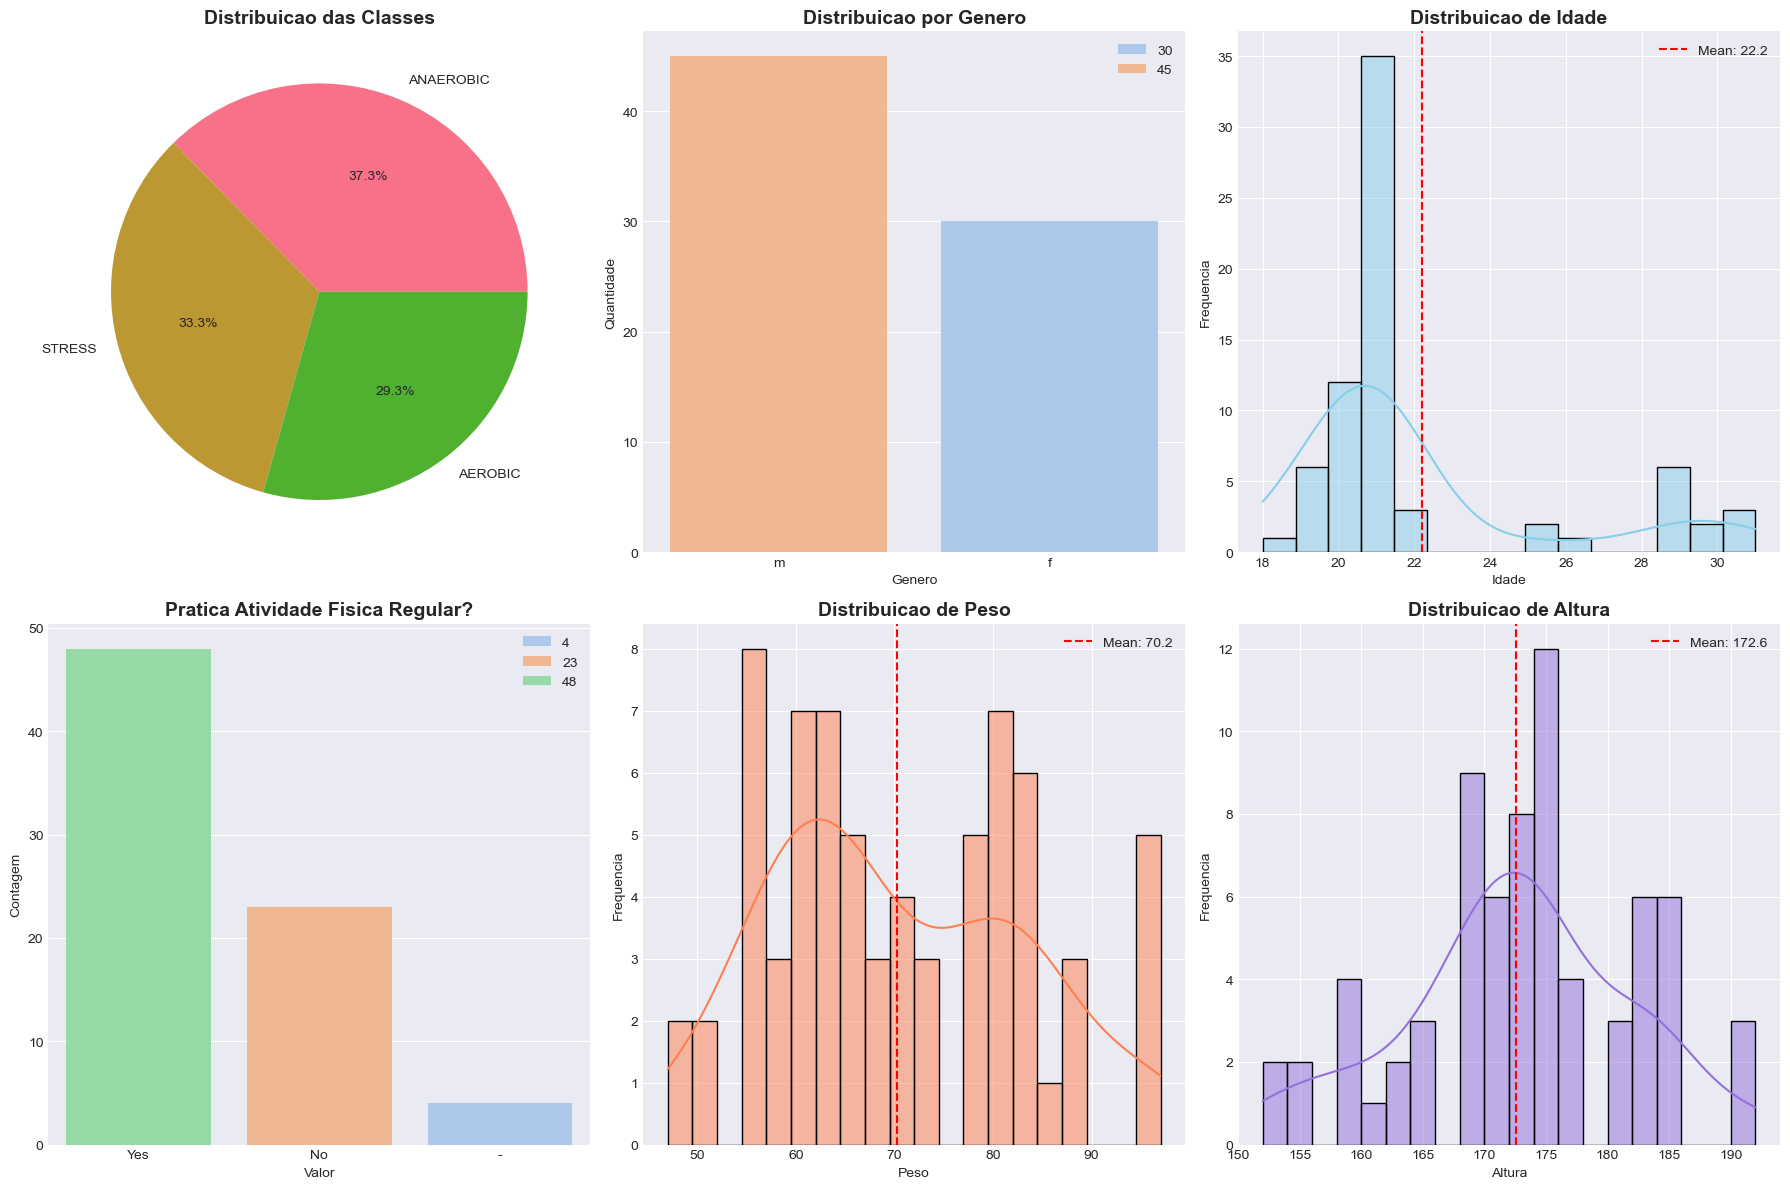

In [25]:
plot_distribuicoes_basicas(train_df)

---
### Pré-processamento

Nesta seção, as funções da etapa de pré-processamento dos dados devem ser implementadas e aplicadas (se necessário).

---
### Experimento

Nesta seção, o experimento deve ser conduzido, utilizando os protocolos experimentais padrões e testando diferentes modelos.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer

In [6]:
TARGET_COL = "Label" 
ID_COL = "Id"

le_target = LabelEncoder()
train_df[TARGET_COL] = le_target.fit_transform(train_df[TARGET_COL])

X = train_df.drop(columns=[TARGET_COL, ID_COL])
Y = train_df[TARGET_COL]


cat_cols = X.select_dtypes(include=["object", "category"]).columns
num_cols = X.select_dtypes(exclude=["object", "category"]).columns

encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    encoders[col] = le

    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    test_df[col] = test_df[col].map(mapping).fillna(-1).astype(int)


imputer = SimpleImputer(strategy="mean")
X[num_cols] = imputer.fit_transform(X[num_cols])
test_df[num_cols] = imputer.transform(test_df[num_cols])

X_train, X_val, Y_train, Y_val = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)

In [ ]:
model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1,
    verbosity=0
)

model.fit(X_train, Y_train)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [8]:
from sklearn.metrics import roc_auc_score
y_pred = model.predict(X_val)
acc = accuracy_score(Y_val, y_pred=y_pred)


In [9]:
print(f'Validation Accuracy: {acc:.4f}')

Validation Accuracy: 0.7333


---
### Análise dos Resultados

Nesta seção, os resultados devem ser exibidos através de tabelas e gráficos, comparados e profundamente analisados.

---
### Salvar resultado



In [ ]:
X_test = test_df[X.columns] 
probs_test = model.predict_proba(X_test)


# é sempre bom dar uma olhada no numero das classes certinho antes de salvar a submissão  
# (#print(le_target.classes_))
submission = pd.DataFrame({
    "Id": test_df[ID_COL],
    "Predicted_0": probs_test[:, 2],
    "Predicted_1": probs_test[:, 0],
    "Predicted_2": probs_test[:, 1],
})

submission.to_csv("submission.csv", index=False)